1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [14]:
import pandas as pd 
import numpy as np
import datetime as dt

file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
N=14500

data_frame=pd.DataFrame(data)
print(data_frame.head(N))
data


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
14495     1     0           40  3869200311        2789        19
14496     1     1            6  3869200311        2792        17
14497     1     0          115  3869200311        2787        12
14498     1     0          113  3869200311        2791        21
14499     1     0           42  3869200311        2789         3

[14500 rows x 6 columns]


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [18]:
column = data["BX_COUNTER"]
x = column.max()

print("BX counter reaches the maximum value before being reset to 0 is :",x)


BX counter reaches the maximum value before being reset to 0 is : 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [45]:
import pandas as pd 
import datetime
import datetime as dt


data['ABS_TIME'] = x*25*data['ORBIT_CNT'] + 25*data['BX_COUNTER'] + (25/30)*data['TDC_MEAS']
data



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


4. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset. 

In [46]:

data['ABS_TIME'] = pd.to_timedelta(data['ABS_TIME'])
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3 days 23:44:09.004934896
1,1,0,124,3869200167,2374,27,3 days 23:44:09.004934897
2,1,0,63,3869200167,2553,28,3 days 23:44:09.004939373
3,1,0,64,3869200167,2558,19,3 days 23:44:09.004939490
4,1,0,64,3869200167,2760,25,3 days 23:44:09.004944545
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3 days 23:44:09.985075886
1310716,1,1,4,3869211171,763,11,3 days 23:44:09.985075909
1310717,1,0,64,3869211171,764,0,3 days 23:44:09.985075925
1310718,1,0,139,3869211171,769,0,3 days 23:44:09.985076050


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [63]:
grouped_data= data.groupby("HEAD")["TDC_CHANNEL"]
print(grouped_data.nlargest(3))


HEAD    
1     7     139
      15    139
      30    139
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [57]:
print("number of non-empty orbits:",data["ORBIT_CNT"].unique().shape[0])

number of non-empty orbits: 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [58]:
print("number of unique orbits with at least one measurement with TDC_CHANNEL=139:",data[data["TDC_CHANNEL"]==139]["ORBIT_CNT"].unique().shape[0])

number of unique orbits with at least one measurement with TDC_CHANNEL=139: 10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [61]:
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print("Series 1:", FPGA_0)
print("Series 2:", FPGA_1)

Series 1: 139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
Series 2: 2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

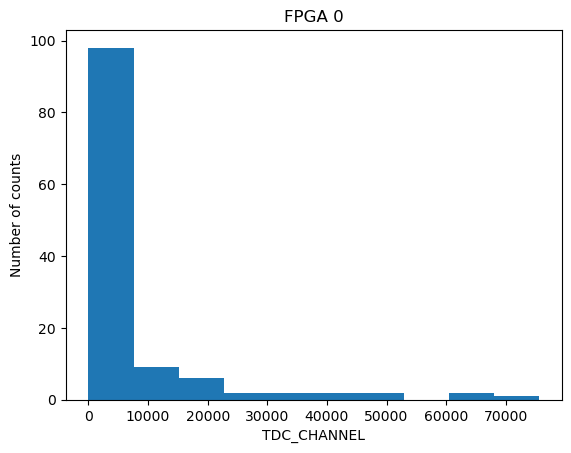

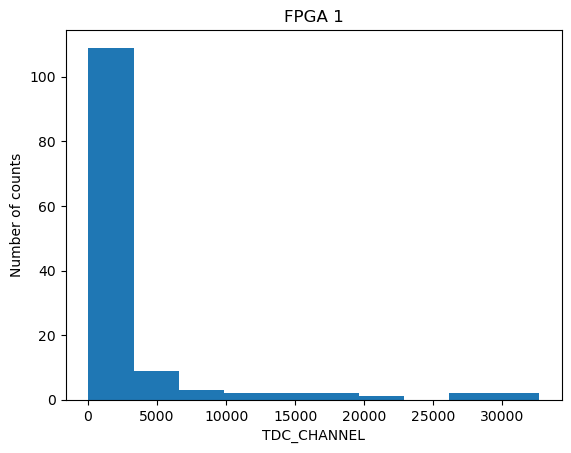

In [62]:
import matplotlib.pyplot as plt

plt.hist(FPGA_0)
plt.title('FPGA 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()
print("\n")
plt.hist(FPGA_1)
plt.title('FPGA 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()